# Project: Investigate European Championship soccer dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I selected the soccer database. <br>
Each table is saved in a different csv file: <br>
Country.csv, League.csv, Match.csv, Player.csv, Player_attributes.csv, Team.csv, Team_Attributes.csv <br>
<br>
First, a result table is built by team and by season. The table is then analysed in different ways in order to answer following questions: <br>
 - **What are team attributes of successful, average and unsuccessful teams?**
 - **Are all soccer european championships as tight?**
 - **Is it favorable to play at home?**
 - **How championship winner results evolve with time?**

Each question will be answered with some statistics and data visuaisation using panda and matplotlib


In [1]:
import pandas as pd
from pandas import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
ls *.csv

Country.csv            Player.csv             Team_Attributes.csv
League.csv             Player_attributes.csv
Match.csv              Team.csv


#### Load soccer dataset and check the content

In [3]:
df_match=pd.read_csv('Match.csv')
df_team=pd.read_csv('Team.csv')
df_team_attributes=pd.read_csv('Team_Attributes.csv')
df_league=pd.read_csv('League.csv')
df_country=pd.read_csv('Country.csv')

In [4]:
df_match.columns.values
df_team.columns.values
df_team_attributes.columns.values
df_league.columns.values
df_country.columns.values

array(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'aw

array(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'], dtype=object)

array(['id', 'team_fifa_api_id', 'team_api_id', 'date',
       'buildUpPlaySpeed', 'buildUpPlaySpeedClass',
       'buildUpPlayDribbling', 'buildUpPlayDribblingClass',
       'buildUpPlayPassing', 'buildUpPlayPassingClass',
       'buildUpPlayPositioningClass', 'chanceCreationPassing',
       'chanceCreationPassingClass', 'chanceCreationCrossing',
       'chanceCreationCrossingClass', 'chanceCreationShooting',
       'chanceCreationShootingClass', 'chanceCreationPositioningClass',
       'defencePressure', 'defencePressureClass', 'defenceAggression',
       'defenceAggressionClass', 'defenceTeamWidth',
       'defenceTeamWidthClass', 'defenceDefenderLineClass'], dtype=object)

array(['id', 'country_id', 'name'], dtype=object)

array(['id', 'name'], dtype=object)

#### Remove columns that won't be used in match dataset, other datasets are smaller and don't need to be reduced in size

In [5]:
df_match.drop(columns=['home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_player_Y9', 'away_player_Y10',
       'away_player_Y11', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9',
       'home_player_10', 'home_player_11', 'away_player_1',
       'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5',
       'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9',
       'away_player_10', 'away_player_11', 'goal', 'shoton', 'shotoff',
       'foulcommit', 'card', 'cross', 'corner', 'possession', 'B365H',
       'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH',
       'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH',
       'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH',
       'BSD', 'BSA'],inplace=True)

#### check all dataset are clean

In [6]:
df_match.tablename = 'df_match'
df_team.tablename = 'df_team'
df_team_attributes.tablename = 'df_team_attributes'
df_league.tablename = 'df_league'
df_country.tablename = 'df_country'
for dataset in [df_match,df_team,df_team_attributes,df_league,df_country]:
    if isinstance(dataset.tablename, basestring):
        print 'any NaN in dataframe '+dataset.tablename+'?'
    else:
        print 'any NaN in '+dataset.tablename[0]+'?'
    dataset.isnull().any().any()

any NaN in dataframe df_match?


False

any NaN in dataframe df_team?


False

any NaN in dataframe df_team_attributes?


False

any NaN in dataframe df_league?


False

any NaN in dataframe df_country?


False

#### create new dataset with results by season and by team
several steps are needed:
   - calculate points distributed for each match (win:3, draw:1, lost:0) <br>
   - aggregate team performance data by season and by team <br>
   - generate summary table with following team performance indicators: goal scored and conceded, points scored, win/draw/lose, number of match played and corrected indicators for 38 matches played by season (some leagues play less matches)

In [7]:
def point_scored(df,side):
    if df['home_team_goal']==df['away_team_goal']:
        home_team_point=1
        away_team_point=1
    elif df['home_team_goal']>df['away_team_goal']:
        home_team_point=3
        away_team_point=0
    else:
        home_team_point=0
        away_team_point=3
    if side=='home':
        return home_team_point
    elif side=='away':
        return away_team_point
df_match['home_team_point']=df_match[['home_team_goal','away_team_goal']]\
    .apply(lambda x: point_scored(x,'home'),axis=1)
df_match['away_team_point']=df_match[['home_team_goal','away_team_goal']]\
    .apply(lambda x: point_scored(x,'away'),axis=1)
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_point,away_team_point
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1,1
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,3,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,0,3


aggregate match results (home, then away, then all together)

In [8]:
def league_result_aggregation_home(df):
    agg_dict={
        'home_match':df['home_team_goal'].shape[0],
        'home_scored_goal':df['home_team_goal'].sum(),
        'home_conceded_goal':df['away_team_goal'].sum(),
        'home_point':df['home_team_point'].sum(),
        'home_win':df[df['home_team_point']==3].shape[0],
        'home_draw':df[df['home_team_point']==1].shape[0],
        'home_lose':df[df['home_team_point']==0].shape[0]
    }
    return pd.Series(agg_dict)
df_league_result_home=df_match.groupby(by=['season','home_team_api_id','league_id'],as_index=False)\
    .apply(league_result_aggregation_home)\
    .reset_index()\
    .rename({'home_team_api_id':'team_api_id'},axis=1)
df_league_result_home.head()

,season,team_api_id,league_id,home_conceded_goal,home_draw,home_lose,home_match,home_point,home_scored_goal,home_win
0,2008/2009,1601,15722,11,3,6,15,21,13,6
1,2008/2009,1957,15722,15,2,4,15,29,24,9
2,2008/2009,2182,15722,10,7,1,15,28,22,7
3,2008/2009,2183,15722,10,6,2,15,27,19,7
4,2008/2009,2186,15722,8,6,3,15,24,12,6


In [9]:
def league_result_aggregation_away(df):
    agg_dict={
        'away_match':df['away_team_goal'].shape[0],
        'away_scored_goal':df['away_team_goal'].sum(),
        'away_conceded_goal':df['home_team_goal'].sum(),
        'away_point':df['away_team_point'].sum(),
        'away_win':df[df['away_team_point']==3].shape[0],
        'away_draw':df[df['away_team_point']==1].shape[0],
        'away_lose':df[df['away_team_point']==0].shape[0]
    }
    return pd.Series(agg_dict)
df_league_result_away=df_match.groupby(by=['season','away_team_api_id','league_id'],as_index=False)\
    .apply(league_result_aggregation_away)\
    .reset_index()\
    .rename({'away_team_api_id':'team_api_id'},axis=1)
df_league_result_away.head()

,season,team_api_id,league_id,away_conceded_goal,away_draw,away_lose,away_match,away_point,away_scored_goal,away_win
0,2008/2009,1601,15722,21,4,8,15,13,9,3
1,2008/2009,1957,15722,19,5,10,15,5,4,0
2,2008/2009,2182,15722,14,4,2,15,31,29,9
3,2008/2009,2183,15722,13,3,4,15,27,21,8
4,2008/2009,2186,15722,32,3,11,15,6,12,1


In [10]:
df_league_result=pd.merge(df_league_result_home,df_league_result_away,how='inner',
                          left_on=['season','team_api_id','league_id'],
                          right_on=['season','team_api_id','league_id'])
df_league_result.head()

,season,team_api_id,league_id,home_conceded_goal,home_draw,home_lose,home_match,home_point,home_scored_goal,home_win,away_conceded_goal,away_draw,away_lose,away_match,away_point,away_scored_goal,away_win
0,2008/2009,1601,15722,11,3,6,15,21,13,6,21,4,8,15,13,9,3
1,2008/2009,1957,15722,15,2,4,15,29,24,9,19,5,10,15,5,4,0
2,2008/2009,2182,15722,10,7,1,15,28,22,7,14,4,2,15,31,29,9
3,2008/2009,2183,15722,10,6,2,15,27,19,7,13,3,4,15,27,21,8
4,2008/2009,2186,15722,8,6,3,15,24,12,6,32,3,11,15,6,12,1


compute extra data like 
   - corrected goals and points so that all leagues can be compared regardless of the number of teams inside the leg (corrected data are projected to a league made of 20 teams (38 matches by season)
   - away vs home ratio of point, scored goals and conceded goals

In [11]:
df_league_result['scored_goal']=df_league_result['home_scored_goal']+df_league_result['away_scored_goal']
df_league_result['conceded_goal']=df_league_result['home_conceded_goal']+df_league_result['away_conceded_goal']
df_league_result['goal_difference']=df_league_result['scored_goal']-df_league_result['conceded_goal']
df_league_result['point']=df_league_result['home_point']+df_league_result['away_point']
df_league_result['total_match']=df_league_result['home_match']+df_league_result['away_match']
df_league_result['total_win']=df_league_result['home_win']+df_league_result['away_win']
df_league_result['total_draw']=df_league_result['home_draw']+df_league_result['away_draw']
df_league_result['total_lose']=df_league_result['home_lose']+df_league_result['away_lose']
df_league_result['scored_goal_corrected']=df_league_result['scored_goal']*38/df_league_result['total_match']
df_league_result['conceded_goal_corrected']=df_league_result['conceded_goal']*38/df_league_result['total_match']
df_league_result['goal_difference_corrected']=df_league_result['goal_difference']*38/df_league_result['total_match']
df_league_result['point_corrected']=df_league_result['point']*38/df_league_result['total_match']
df_league_result['away_vs_home_point']=df_league_result['away_point']/df_league_result['home_point']
df_league_result['away_vs_home_scored_goal']=df_league_result['away_scored_goal']/df_league_result['home_scored_goal']
df_league_result['away_vs_home_conceded_goal']=df_league_result['away_conceded_goal']/df_league_result['home_conceded_goal']
df_league_result['year']=df_league_result['season'].apply(lambda x: int(x.split('/')[1]))
df_league_result.head()

,season,team_api_id,league_id,home_conceded_goal,home_draw,home_lose,home_match,home_point,home_scored_goal,home_win,...,total_draw,total_lose,scored_goal_corrected,conceded_goal_corrected,goal_difference_corrected,point_corrected,away_vs_home_point,away_vs_home_scored_goal,away_vs_home_conceded_goal,year
0,2008/2009,1601,15722,11,3,6,15,21,13,6,...,7,14,27.866667,40.533333,-12.666667,43.066667,0.619048,0.692308,1.909091,2009
1,2008/2009,1957,15722,15,2,4,15,29,24,9,...,7,14,35.466667,43.066667,-7.600000,43.066667,0.172414,0.166667,1.266667,2009
2,2008/2009,2182,15722,10,7,1,15,28,22,7,...,11,3,64.600000,30.400000,34.200000,74.733333,1.107143,1.318182,1.400000,2009
3,2008/2009,2183,15722,10,6,2,15,27,19,7,...,9,6,50.666667,29.133333,21.533333,68.400000,1.000000,1.105263,1.300000,2009
4,2008/2009,2186,15722,8,6,3,15,24,12,6,...,9,14,30.400000,50.666667,-20.266667,38.000000,0.250000,1.000000,4.000000,2009


### teams are ranked by country, season and according to point, goal difference and scored goals

In [12]:
def rank_function(df):
    df = df.sort_values(by=['point','goal_difference','scored_goal'],ascending=[False,False,False])
    df['rank']= df.reset_index().index + 1
    return df
df_league_result=df_league_result.groupby(by=['league_id','season'],as_index=False)\
    .apply(rank_function)\
    .reset_index(drop=True)
df_league_result.head()

,season,team_api_id,league_id,home_conceded_goal,home_draw,home_lose,home_match,home_point,home_scored_goal,home_win,...,total_lose,scored_goal_corrected,conceded_goal_corrected,goal_difference_corrected,point_corrected,away_vs_home_point,away_vs_home_scored_goal,away_vs_home_conceded_goal,year,rank
0,2008/2009,8635,1,15,1,2,17,43,48,14,...,5,83.823529,33.529412,50.294118,86.058824,0.790698,0.562500,1.000000,2009,1
1,2008/2009,9985,1,12,0,2,17,45,42,15,...,5,73.764706,29.058824,44.705882,86.058824,0.711111,0.571429,1.166667,2009,2
2,2008/2009,9991,1,15,3,5,17,30,31,9,...,9,74.882353,46.941176,27.941176,65.941176,0.966667,1.161290,1.800000,2009,3
3,2008/2009,8342,1,23,2,4,17,35,37,11,...,11,65.941176,55.882353,10.058824,65.941176,0.685714,0.594595,1.173913,2009,4
4,2008/2009,10000,1,15,6,2,17,33,31,9,...,11,61.470588,40.235294,21.235294,61.470588,0.666667,0.774194,1.400000,2009,5


### good team / bad team identification

In [13]:
def team_class(df):
    x=''
    if df['good_team_temp']<3:
        x='good_team'
    elif df['bad_team_temp']<3:
        x='bad_team'
    return x

df_league_result['good_team_temp']=df_league_result.groupby(by=['league_id','season'])['rank'].transform(lambda x: (x - x.min()))
df_league_result['bad_team_temp']=df_league_result.groupby(by=['league_id','season'])['rank'].transform(lambda x: (x.max()-x))    
df_league_result['team_class']=df_league_result.apply(team_class,axis=1)
df_league_result.drop(['good_team_temp', 'bad_team_temp'], axis=1,inplace=True)
df_league_result.head()

,season,team_api_id,league_id,home_conceded_goal,home_draw,home_lose,home_match,home_point,home_scored_goal,home_win,...,scored_goal_corrected,conceded_goal_corrected,goal_difference_corrected,point_corrected,away_vs_home_point,away_vs_home_scored_goal,away_vs_home_conceded_goal,year,rank,team_class
0,2008/2009,8635,1,15,1,2,17,43,48,14,...,83.823529,33.529412,50.294118,86.058824,0.790698,0.562500,1.000000,2009,1,good_team
1,2008/2009,9985,1,12,0,2,17,45,42,15,...,73.764706,29.058824,44.705882,86.058824,0.711111,0.571429,1.166667,2009,2,good_team
2,2008/2009,9991,1,15,3,5,17,30,31,9,...,74.882353,46.941176,27.941176,65.941176,0.966667,1.161290,1.800000,2009,3,good_team
3,2008/2009,8342,1,23,2,4,17,35,37,11,...,65.941176,55.882353,10.058824,65.941176,0.685714,0.594595,1.173913,2009,4,
4,2008/2009,10000,1,15,6,2,17,33,31,9,...,61.470588,40.235294,21.235294,61.470588,0.666667,0.774194,1.400000,2009,5,


### include team name and league name information
merge league_result dataframe with league dataframe to get league name <br>
merge league_result dataframe with country dataframe to get country name <br>
merge league_result dataframe with team dataframe to get team name <br>
merge is performed based on league_id, country_id and team_api_id <br>

In [14]:
df_league_result=pd.merge(df_league_result,df_league,how='left',left_on='league_id',right_on='id')
df_league_result.rename(columns={'name': 'league_name'},inplace=True)
df_league_result.drop(columns='id',inplace=True)
df_league_result=pd.merge(df_league_result,df_country,how='left',left_on='country_id',right_on='id')
df_league_result.rename(columns={'name': 'country_name'},inplace=True)
df_league_result.drop(columns='id',inplace=True)
df_league_result=pd.merge(df_league_result,df_team[['team_api_id','team_long_name','team_short_name']],
                          how='left',on='team_api_id')
df_league_result.head()

,season,team_api_id,league_id,home_conceded_goal,home_draw,home_lose,home_match,home_point,home_scored_goal,home_win,...,away_vs_home_scored_goal,away_vs_home_conceded_goal,year,rank,team_class,country_id,league_name,country_name,team_long_name,team_short_name
0,2008/2009,8635,1,15,1,2,17,43,48,14,...,0.562500,1.000000,2009,1,good_team,1,Belgium Jupiler League,Belgium,RSC Anderlecht,AND
1,2008/2009,9985,1,12,0,2,17,45,42,15,...,0.571429,1.166667,2009,2,good_team,1,Belgium Jupiler League,Belgium,Standard de Liège,STL
2,2008/2009,9991,1,15,3,5,17,30,31,9,...,1.161290,1.800000,2009,3,good_team,1,Belgium Jupiler League,Belgium,KAA Gent,GEN
3,2008/2009,8342,1,23,2,4,17,35,37,11,...,0.594595,1.173913,2009,4,,1,Belgium Jupiler League,Belgium,Club Brugge KV,CLB
4,2008/2009,10000,1,15,6,2,17,33,31,9,...,0.774194,1.400000,2009,5,,1,Belgium Jupiler League,Belgium,SV Zulte-Waregem,ZUL


### include team attribute information
this step is more complicated because there is no matching key between team_attributes and league_result dataframes <br>
it is decided to figure out the season in team_attributes dataframe based on the date <br>
then merge is done based on season

In [15]:
def define_season(df):
    if df['date'].month<7:
        season=str(df['date'].year-1)+'/'+str(df['date'].year)
    else:
        season=str(df['date'].year)+'/'+str(df['date'].year+1)
    return season
df_team_attributes['date']=pd.to_datetime(df_team_attributes['date'])
df_team_attributes['season']=df_team_attributes.apply(define_season,axis=1)
df_team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,season
0,1,434,9930,2010-02-22,60,Balanced,<null>,Little,50,Mixed,...,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,2009/2010
1,2,434,9930,2014-09-19,52,Balanced,48,Normal,56,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,2014/2015
2,3,434,9930,2015-09-10,47,Balanced,41,Normal,54,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,2015/2016
3,4,77,8485,2010-02-22,70,Fast,<null>,Little,70,Long,...,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,2009/2010
4,5,77,8485,2011-02-22,47,Balanced,<null>,Little,52,Mixed,...,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,2010/2011


In [16]:
df_league_result=pd.merge(df_league_result,df_team_attributes,how='left',
                          left_on=['team_api_id','season'],
                          right_on=['team_api_id','season'])
df_league_result.head()

,season,team_api_id,league_id,home_conceded_goal,home_draw,home_lose,home_match,home_point,home_scored_goal,home_win,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,2008/2009,8635,1,15,1,2,17,43,48,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/2009,9985,1,12,0,2,17,45,42,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/2009,9991,1,15,3,5,17,30,31,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/2009,8342,1,23,2,4,17,35,37,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/2009,10000,1,15,6,2,17,33,31,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='eda'></a>
## Exploratory Data Analysis

### Build a result table by country and by season

Text(0.5,1,'Result of football national championship in Belgium')

Text(0.5,0.88,'season 2008/2009')

(0.0, 1.0, 0.0, 1.0)

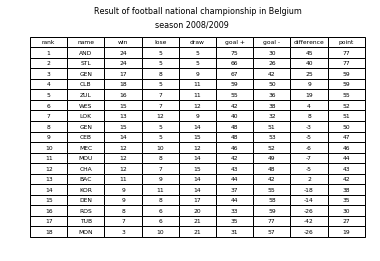

Text(0.5,1,'Result of football national championship in Belgium')

Text(0.5,0.88,'season 2009/2010')

(0.0, 1.0, 0.0, 1.0)

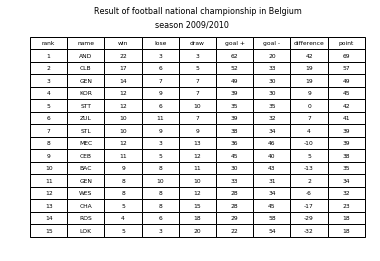

Text(0.5,1,'Result of football national championship in Belgium')

Text(0.5,0.88,'season 2010/2011')

(0.0, 1.0, 0.0, 1.0)

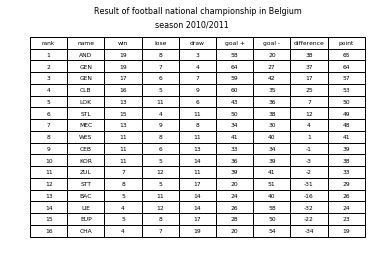

Text(0.5,1,'Result of football national championship in Belgium')

Text(0.5,0.88,'season 2011/2012')

(0.0, 1.0, 0.0, 1.0)

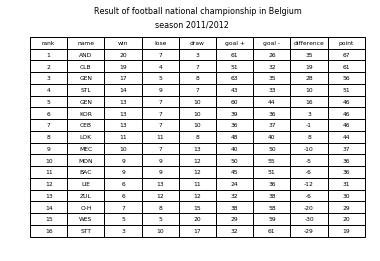

Text(0.5,1,'Result of football national championship in Belgium')

Text(0.5,0.88,'season 2012/2013')

(0.0, 1.0, 0.0, 1.0)

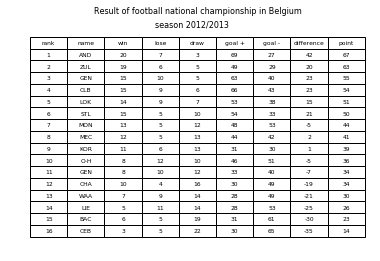

Text(0.5,1,'Result of football national championship in Belgium')

Text(0.5,0.88,'season 2013/2014')

(0.0, 1.0, 0.0, 1.0)

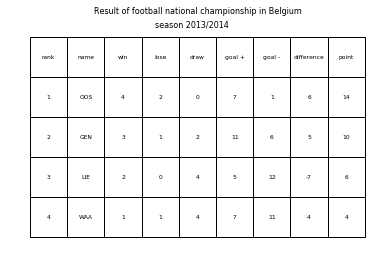

Text(0.5,1,'Result of football national championship in Belgium')

Text(0.5,0.88,'season 2014/2015')

(0.0, 1.0, 0.0, 1.0)

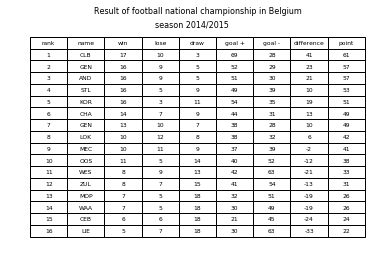

Text(0.5,1,'Result of football national championship in Belgium')

Text(0.5,0.88,'season 2015/2016')

(0.0, 1.0, 0.0, 1.0)

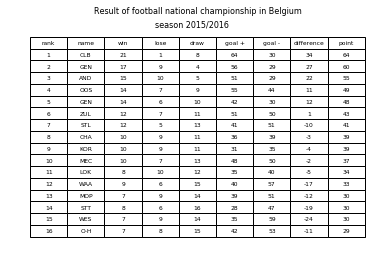

Text(0.5,1,'Result of football national championship in England')

Text(0.5,0.88,'season 2008/2009')

(0.0, 1.0, 0.0, 1.0)

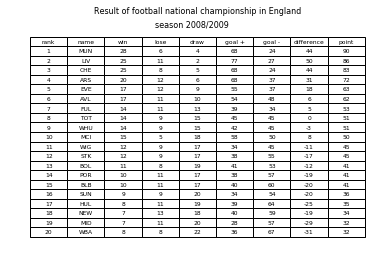

Text(0.5,1,'Result of football national championship in England')

Text(0.5,0.88,'season 2009/2010')

(0.0, 1.0, 0.0, 1.0)

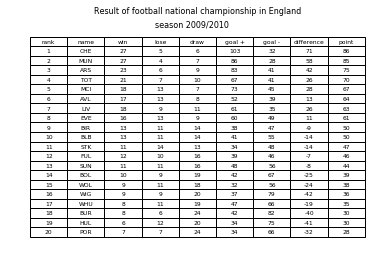

Text(0.5,1,'Result of football national championship in England')

Text(0.5,0.88,'season 2010/2011')

(0.0, 1.0, 0.0, 1.0)

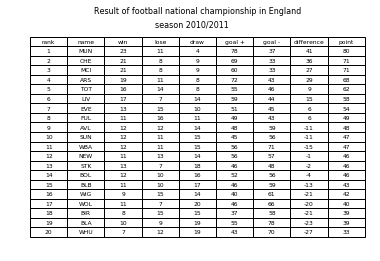

Text(0.5,1,'Result of football national championship in England')

Text(0.5,0.88,'season 2011/2012')

(0.0, 1.0, 0.0, 1.0)

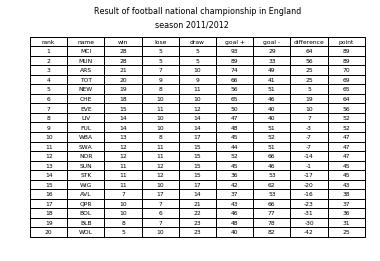

Text(0.5,1,'Result of football national championship in England')

Text(0.5,0.88,'season 2012/2013')

(0.0, 1.0, 0.0, 1.0)

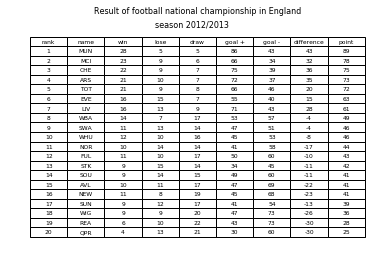

Text(0.5,1,'Result of football national championship in England')

Text(0.5,0.88,'season 2013/2014')

(0.0, 1.0, 0.0, 1.0)

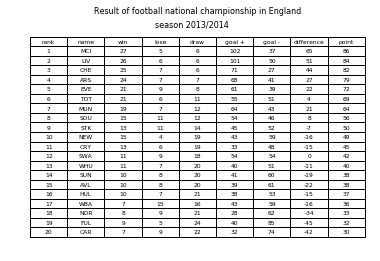

Text(0.5,1,'Result of football national championship in England')

Text(0.5,0.88,'season 2014/2015')

(0.0, 1.0, 0.0, 1.0)

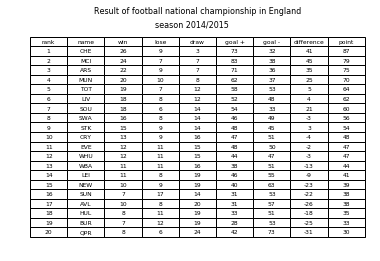

Text(0.5,1,'Result of football national championship in England')

Text(0.5,0.88,'season 2015/2016')

(0.0, 1.0, 0.0, 1.0)

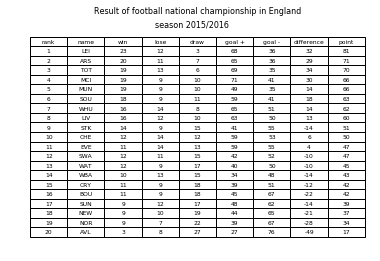

Text(0.5,1,'Result of football national championship in France')

Text(0.5,0.88,'season 2008/2009')

(0.0, 1.0, 0.0, 1.0)

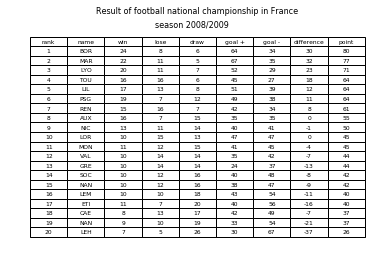

Text(0.5,1,'Result of football national championship in France')

Text(0.5,0.88,'season 2009/2010')

(0.0, 1.0, 0.0, 1.0)

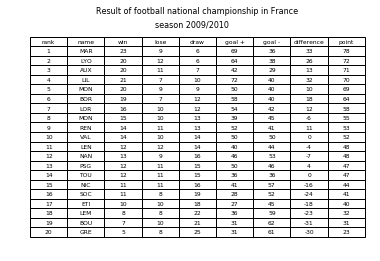

Text(0.5,1,'Result of football national championship in France')

Text(0.5,0.88,'season 2010/2011')

(0.0, 1.0, 0.0, 1.0)

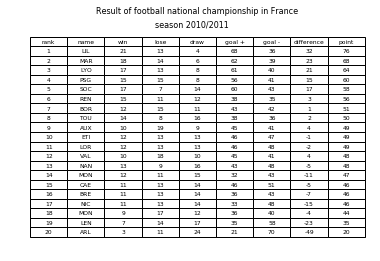

Text(0.5,1,'Result of football national championship in France')

Text(0.5,0.88,'season 2011/2012')

(0.0, 1.0, 0.0, 1.0)

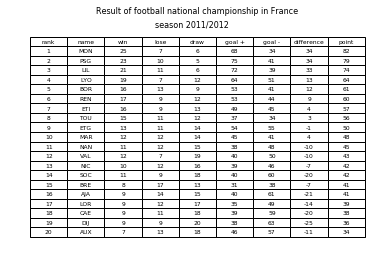

Text(0.5,1,'Result of football national championship in France')

Text(0.5,0.88,'season 2012/2013')

(0.0, 1.0, 0.0, 1.0)

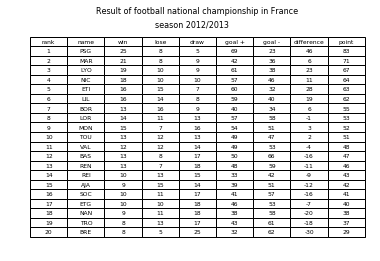

Text(0.5,1,'Result of football national championship in France')

Text(0.5,0.88,'season 2013/2014')

(0.0, 1.0, 0.0, 1.0)

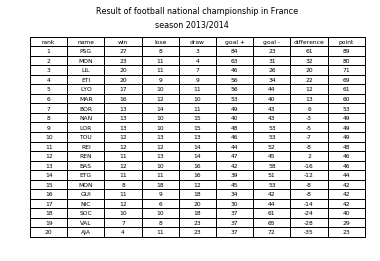

Text(0.5,1,'Result of football national championship in France')

Text(0.5,0.88,'season 2014/2015')

(0.0, 1.0, 0.0, 1.0)

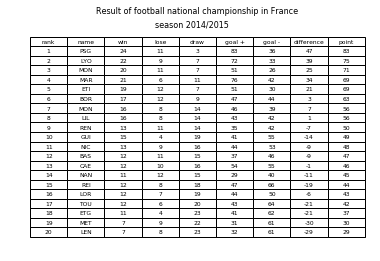

Text(0.5,1,'Result of football national championship in France')

Text(0.5,0.88,'season 2015/2016')

(0.0, 1.0, 0.0, 1.0)

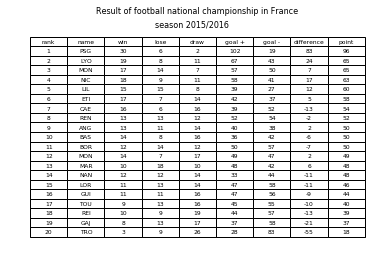

Text(0.5,1,'Result of football national championship in Germany')

Text(0.5,0.88,'season 2008/2009')

(0.0, 1.0, 0.0, 1.0)

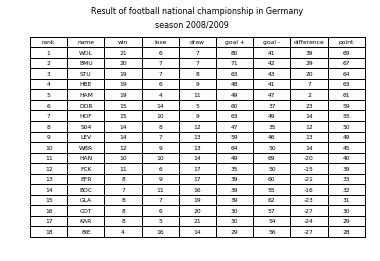

Text(0.5,1,'Result of football national championship in Germany')

Text(0.5,0.88,'season 2009/2010')

(0.0, 1.0, 0.0, 1.0)

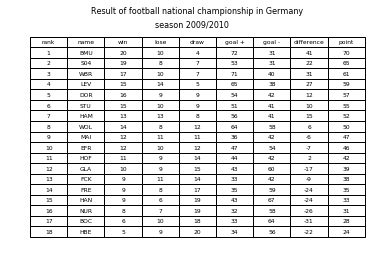

Text(0.5,1,'Result of football national championship in Germany')

Text(0.5,0.88,'season 2010/2011')

(0.0, 1.0, 0.0, 1.0)

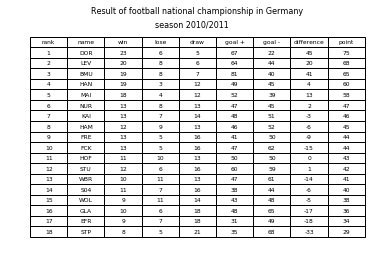

Text(0.5,1,'Result of football national championship in Germany')

Text(0.5,0.88,'season 2011/2012')

(0.0, 1.0, 0.0, 1.0)

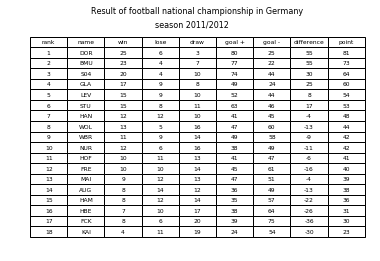

Text(0.5,1,'Result of football national championship in Germany')

Text(0.5,0.88,'season 2012/2013')

(0.0, 1.0, 0.0, 1.0)

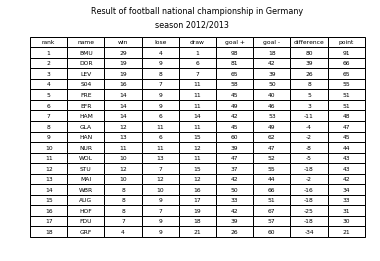

Text(0.5,1,'Result of football national championship in Germany')

Text(0.5,0.88,'season 2013/2014')

(0.0, 1.0, 0.0, 1.0)

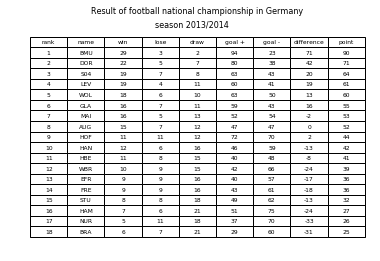

Text(0.5,1,'Result of football national championship in Germany')

Text(0.5,0.88,'season 2014/2015')

(0.0, 1.0, 0.0, 1.0)

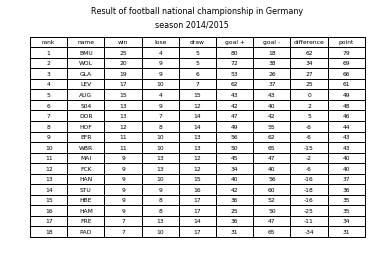

Text(0.5,1,'Result of football national championship in Germany')

Text(0.5,0.88,'season 2015/2016')

(0.0, 1.0, 0.0, 1.0)

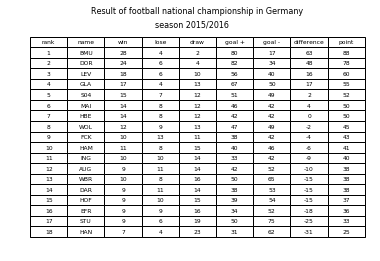

Text(0.5,1,'Result of football national championship in Italy')

Text(0.5,0.88,'season 2008/2009')

(0.0, 1.0, 0.0, 1.0)

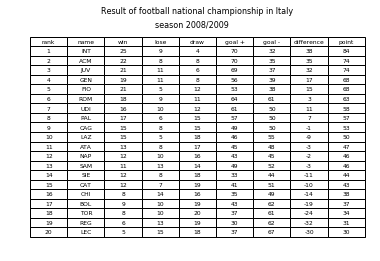

Text(0.5,1,'Result of football national championship in Italy')

Text(0.5,0.88,'season 2009/2010')

(0.0, 1.0, 0.0, 1.0)

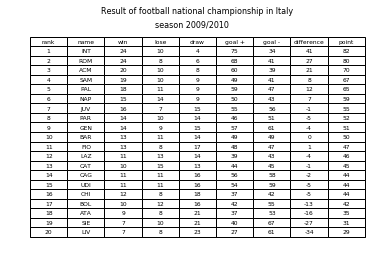

Text(0.5,1,'Result of football national championship in Italy')

Text(0.5,0.88,'season 2010/2011')

(0.0, 1.0, 0.0, 1.0)

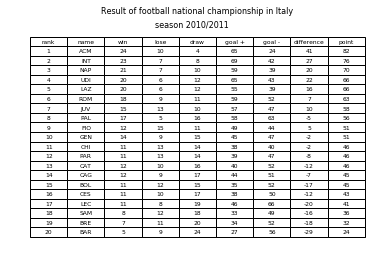

Text(0.5,1,'Result of football national championship in Italy')

Text(0.5,0.88,'season 2011/2012')

(0.0, 1.0, 0.0, 1.0)

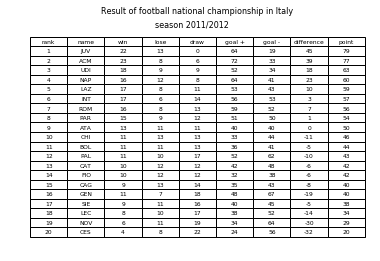

Text(0.5,1,'Result of football national championship in Italy')

Text(0.5,0.88,'season 2012/2013')

(0.0, 1.0, 0.0, 1.0)

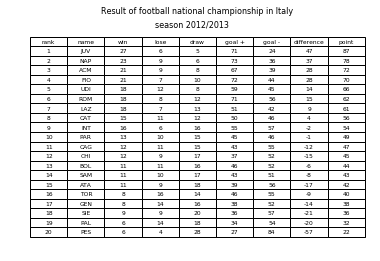

Text(0.5,1,'Result of football national championship in Italy')

Text(0.5,0.88,'season 2013/2014')

(0.0, 1.0, 0.0, 1.0)

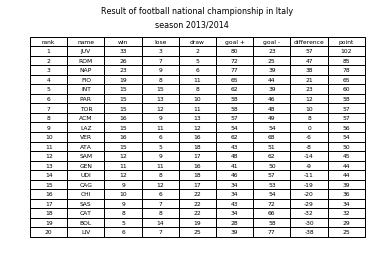

Text(0.5,1,'Result of football national championship in Italy')

Text(0.5,0.88,'season 2014/2015')

(0.0, 1.0, 0.0, 1.0)

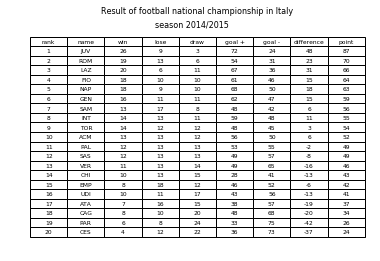

Text(0.5,1,'Result of football national championship in Italy')

Text(0.5,0.88,'season 2015/2016')

(0.0, 1.0, 0.0, 1.0)

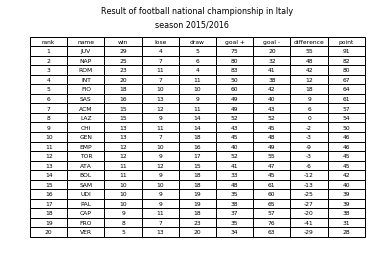

Text(0.5,1,'Result of football national championship in Netherlands')

Text(0.5,0.88,'season 2008/2009')

(0.0, 1.0, 0.0, 1.0)

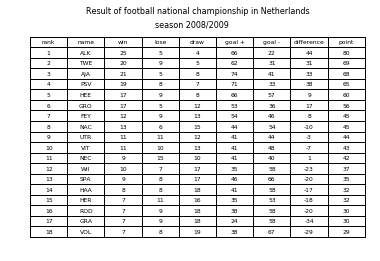

Text(0.5,1,'Result of football national championship in Netherlands')

Text(0.5,0.88,'season 2009/2010')

(0.0, 1.0, 0.0, 1.0)

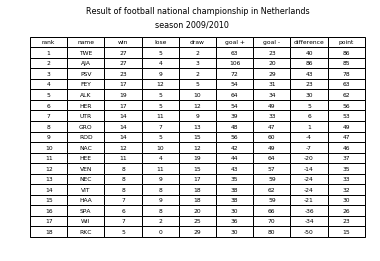

Text(0.5,1,'Result of football national championship in Netherlands')

Text(0.5,0.88,'season 2010/2011')

(0.0, 1.0, 0.0, 1.0)

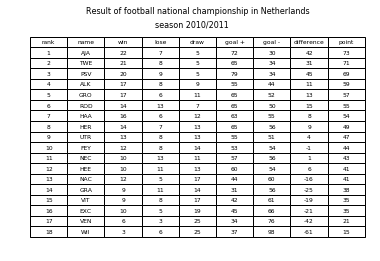

Text(0.5,1,'Result of football national championship in Netherlands')

Text(0.5,0.88,'season 2011/2012')

(0.0, 1.0, 0.0, 1.0)

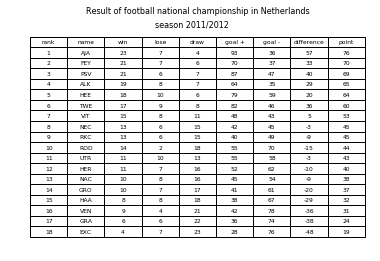

Text(0.5,1,'Result of football national championship in Netherlands')

Text(0.5,0.88,'season 2012/2013')

(0.0, 1.0, 0.0, 1.0)

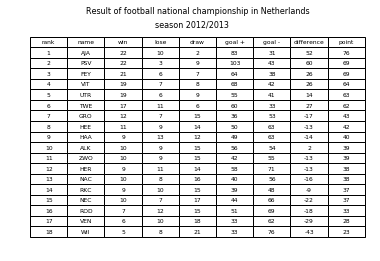

Text(0.5,1,'Result of football national championship in Netherlands')

Text(0.5,0.88,'season 2013/2014')

(0.0, 1.0, 0.0, 1.0)

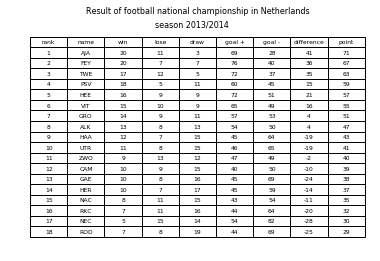

Text(0.5,1,'Result of football national championship in Netherlands')

Text(0.5,0.88,'season 2014/2015')

(0.0, 1.0, 0.0, 1.0)

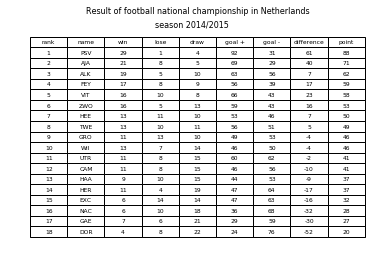

Text(0.5,1,'Result of football national championship in Netherlands')

Text(0.5,0.88,'season 2015/2016')

(0.0, 1.0, 0.0, 1.0)

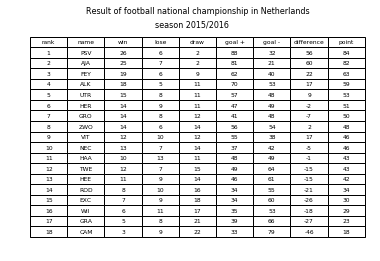

Text(0.5,1,'Result of football national championship in Poland')

Text(0.5,0.88,'season 2008/2009')

(0.0, 1.0, 0.0, 1.0)

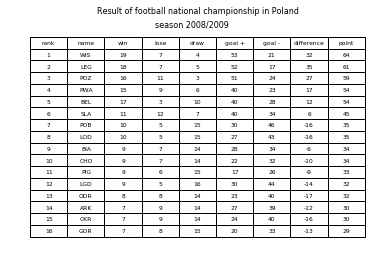

Text(0.5,1,'Result of football national championship in Poland')

Text(0.5,0.88,'season 2009/2010')

(0.0, 1.0, 0.0, 1.0)

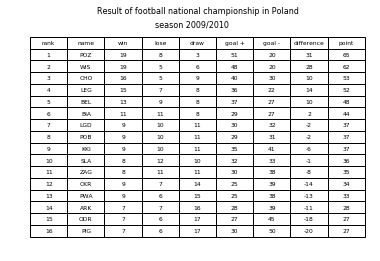

Text(0.5,1,'Result of football national championship in Poland')

Text(0.5,0.88,'season 2010/2011')

(0.0, 1.0, 0.0, 1.0)

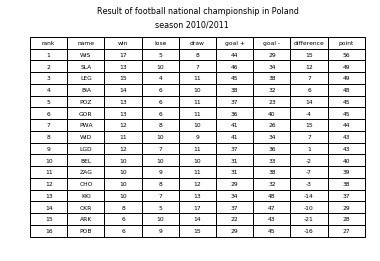

Text(0.5,1,'Result of football national championship in Poland')

Text(0.5,0.88,'season 2011/2012')

(0.0, 1.0, 0.0, 1.0)

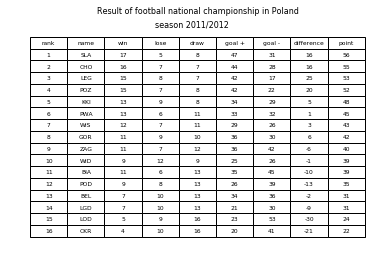

Text(0.5,1,'Result of football national championship in Poland')

Text(0.5,0.88,'season 2012/2013')

(0.0, 1.0, 0.0, 1.0)

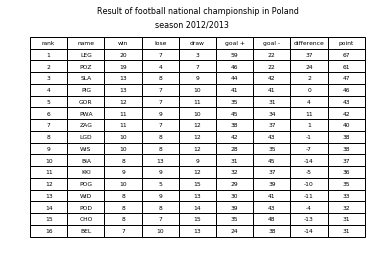

Text(0.5,1,'Result of football national championship in Poland')

Text(0.5,0.88,'season 2013/2014')

(0.0, 1.0, 0.0, 1.0)

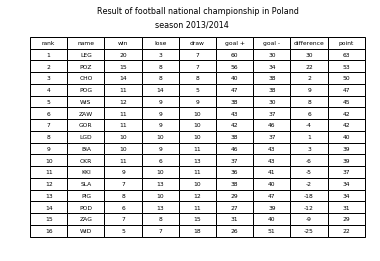

Text(0.5,1,'Result of football national championship in Poland')

Text(0.5,0.88,'season 2014/2015')

(0.0, 1.0, 0.0, 1.0)

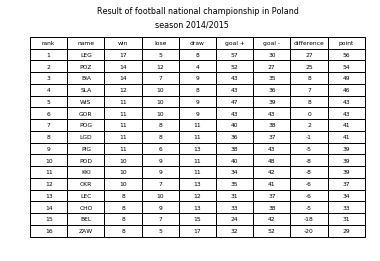

Text(0.5,1,'Result of football national championship in Poland')

Text(0.5,0.88,'season 2015/2016')

(0.0, 1.0, 0.0, 1.0)

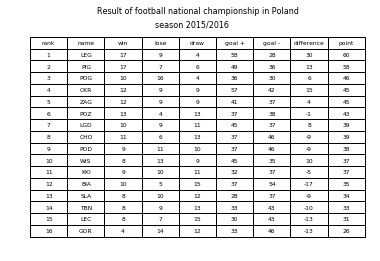

Text(0.5,1,'Result of football national championship in Portugal')

Text(0.5,0.88,'season 2008/2009')

(0.0, 1.0, 0.0, 1.0)

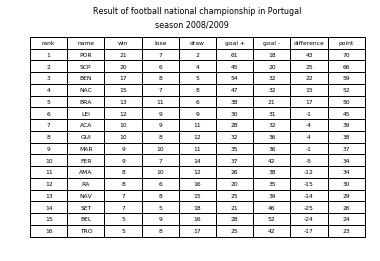

Text(0.5,1,'Result of football national championship in Portugal')

Text(0.5,0.88,'season 2009/2010')

(0.0, 1.0, 0.0, 1.0)

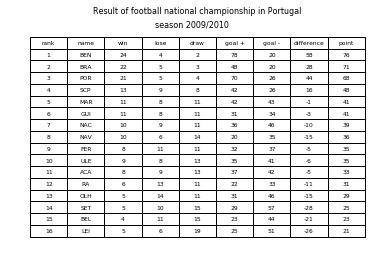

Text(0.5,1,'Result of football national championship in Portugal')

Text(0.5,0.88,'season 2010/2011')

(0.0, 1.0, 0.0, 1.0)

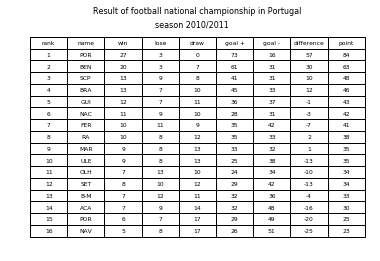

Text(0.5,1,'Result of football national championship in Portugal')

Text(0.5,0.88,'season 2011/2012')

(0.0, 1.0, 0.0, 1.0)

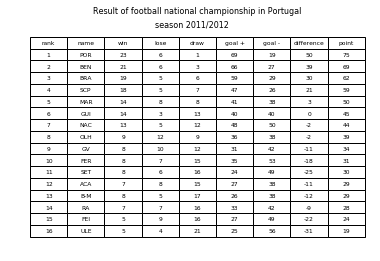

Text(0.5,1,'Result of football national championship in Portugal')

Text(0.5,0.88,'season 2012/2013')

(0.0, 1.0, 0.0, 1.0)

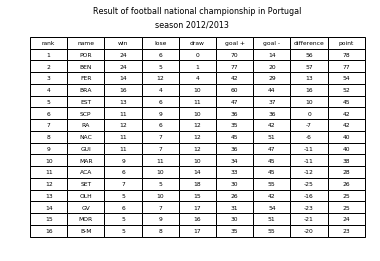

Text(0.5,1,'Result of football national championship in Portugal')

Text(0.5,0.88,'season 2013/2014')

(0.0, 1.0, 0.0, 1.0)

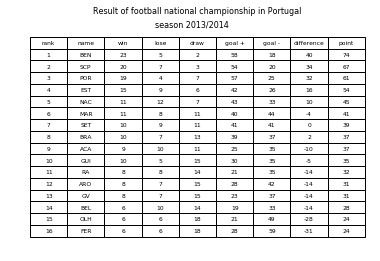

Text(0.5,1,'Result of football national championship in Portugal')

Text(0.5,0.88,'season 2014/2015')

(0.0, 1.0, 0.0, 1.0)

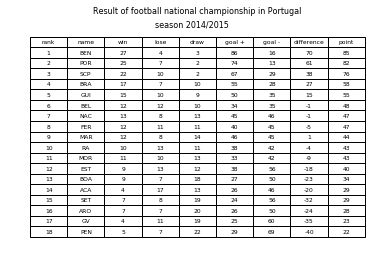

Text(0.5,1,'Result of football national championship in Portugal')

Text(0.5,0.88,'season 2015/2016')

(0.0, 1.0, 0.0, 1.0)

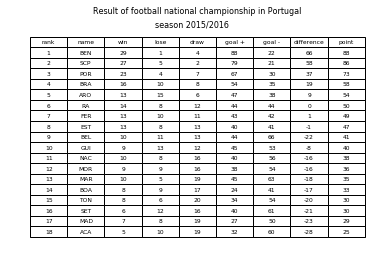

Text(0.5,1,'Result of football national championship in Scotland')

Text(0.5,0.88,'season 2008/2009')

(0.0, 1.0, 0.0, 1.0)

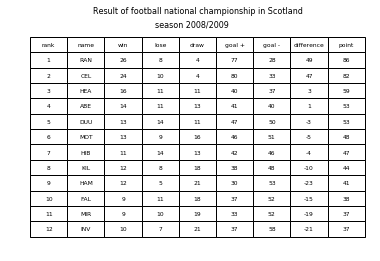

Text(0.5,1,'Result of football national championship in Scotland')

Text(0.5,0.88,'season 2009/2010')

(0.0, 1.0, 0.0, 1.0)

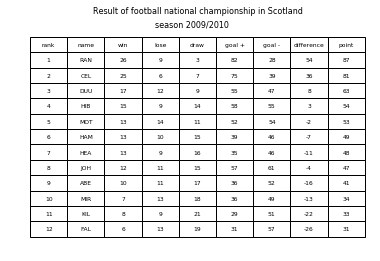

Text(0.5,1,'Result of football national championship in Scotland')

Text(0.5,0.88,'season 2010/2011')

(0.0, 1.0, 0.0, 1.0)

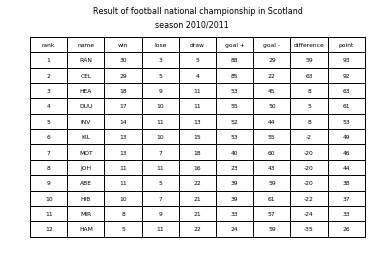

Text(0.5,1,'Result of football national championship in Scotland')

Text(0.5,0.88,'season 2011/2012')

(0.0, 1.0, 0.0, 1.0)

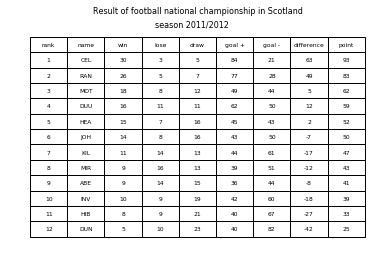

Text(0.5,1,'Result of football national championship in Scotland')

Text(0.5,0.88,'season 2012/2013')

(0.0, 1.0, 0.0, 1.0)

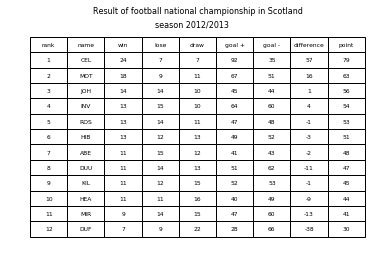

Text(0.5,1,'Result of football national championship in Scotland')

Text(0.5,0.88,'season 2013/2014')

(0.0, 1.0, 0.0, 1.0)

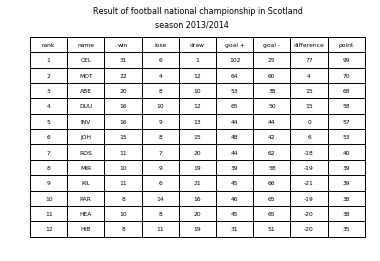

Text(0.5,1,'Result of football national championship in Scotland')

Text(0.5,0.88,'season 2014/2015')

(0.0, 1.0, 0.0, 1.0)

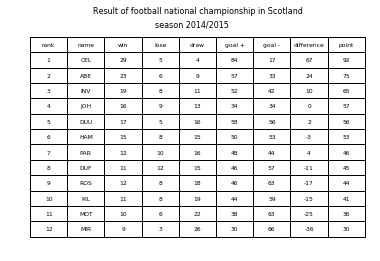

Text(0.5,1,'Result of football national championship in Scotland')

Text(0.5,0.88,'season 2015/2016')

(0.0, 1.0, 0.0, 1.0)

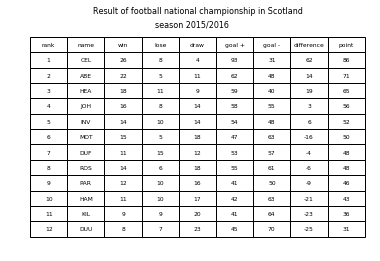

Text(0.5,1,'Result of football national championship in Spain')

Text(0.5,0.88,'season 2008/2009')

(0.0, 1.0, 0.0, 1.0)

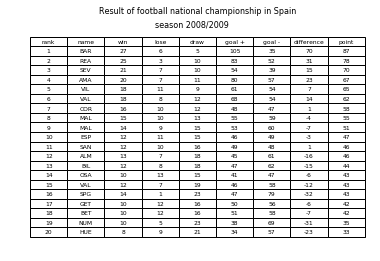

Text(0.5,1,'Result of football national championship in Spain')

Text(0.5,0.88,'season 2009/2010')

(0.0, 1.0, 0.0, 1.0)

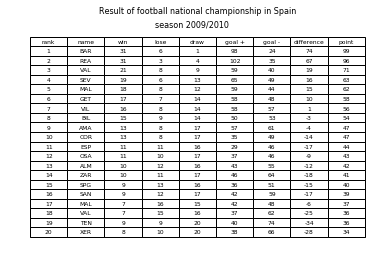

Text(0.5,1,'Result of football national championship in Spain')

Text(0.5,0.88,'season 2010/2011')

(0.0, 1.0, 0.0, 1.0)

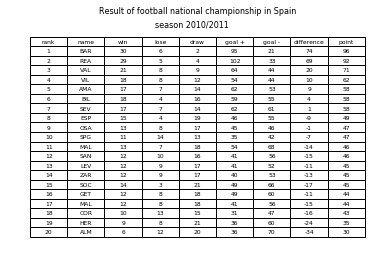

Text(0.5,1,'Result of football national championship in Spain')

Text(0.5,0.88,'season 2011/2012')

(0.0, 1.0, 0.0, 1.0)

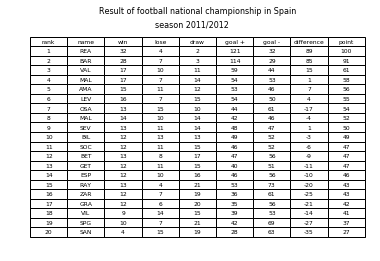

Text(0.5,1,'Result of football national championship in Spain')

Text(0.5,0.88,'season 2012/2013')

(0.0, 1.0, 0.0, 1.0)

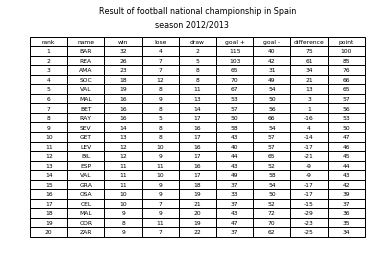

Text(0.5,1,'Result of football national championship in Spain')

Text(0.5,0.88,'season 2013/2014')

(0.0, 1.0, 0.0, 1.0)

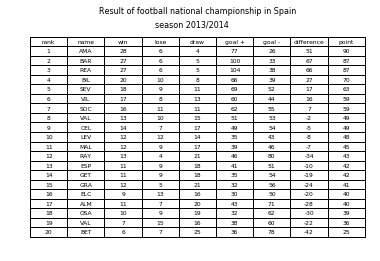

Text(0.5,1,'Result of football national championship in Spain')

Text(0.5,0.88,'season 2014/2015')

(0.0, 1.0, 0.0, 1.0)

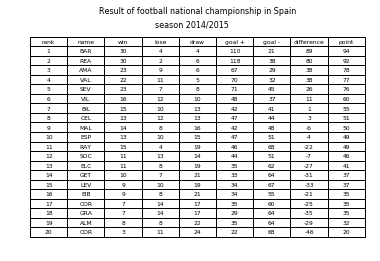

Text(0.5,1,'Result of football national championship in Spain')

Text(0.5,0.88,'season 2015/2016')

(0.0, 1.0, 0.0, 1.0)

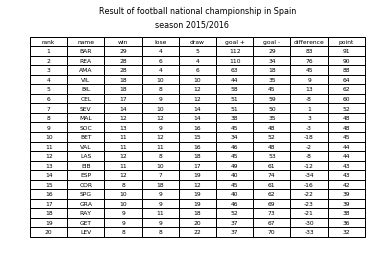

Text(0.5,1,'Result of football national championship in Switzerland')

Text(0.5,0.88,'season 2008/2009')

(0.0, 1.0, 0.0, 1.0)

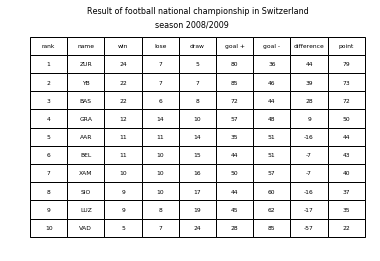

Text(0.5,1,'Result of football national championship in Switzerland')

Text(0.5,0.88,'season 2009/2010')

(0.0, 1.0, 0.0, 1.0)

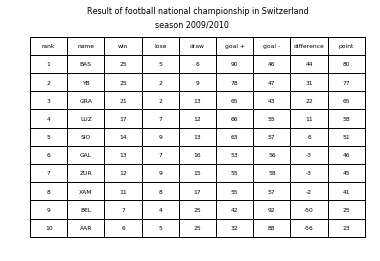

Text(0.5,1,'Result of football national championship in Switzerland')

Text(0.5,0.88,'season 2010/2011')

(0.0, 1.0, 0.0, 1.0)

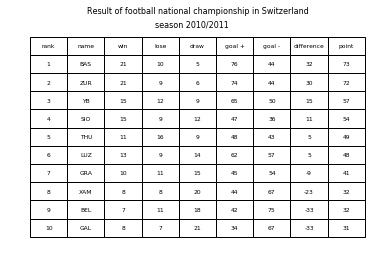

Text(0.5,1,'Result of football national championship in Switzerland')

Text(0.5,0.88,'season 2011/2012')

(0.0, 1.0, 0.0, 1.0)

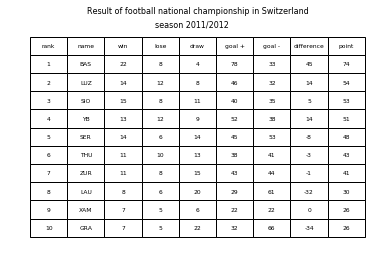

Text(0.5,1,'Result of football national championship in Switzerland')

Text(0.5,0.88,'season 2012/2013')

(0.0, 1.0, 0.0, 1.0)

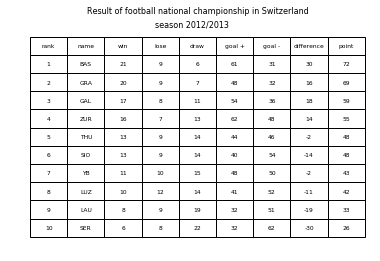

Text(0.5,1,'Result of football national championship in Switzerland')

Text(0.5,0.88,'season 2013/2014')

(0.0, 1.0, 0.0, 1.0)

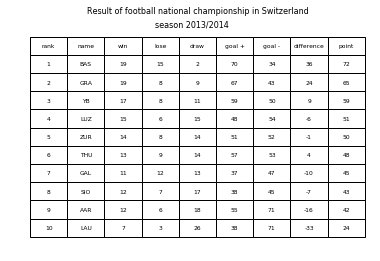

Text(0.5,1,'Result of football national championship in Switzerland')

Text(0.5,0.88,'season 2014/2015')

(0.0, 1.0, 0.0, 1.0)

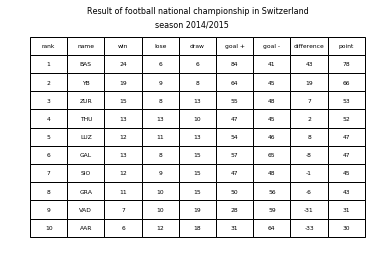

Text(0.5,1,'Result of football national championship in Switzerland')

Text(0.5,0.88,'season 2015/2016')

(0.0, 1.0, 0.0, 1.0)

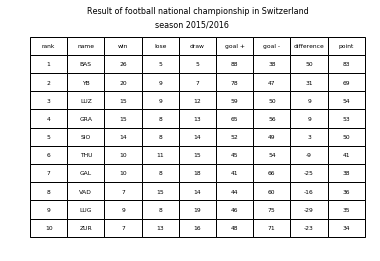

In [17]:
country_list=df_league_result['country_name'].unique()
season_list=df_league_result['season'].unique()

pp = PdfPages('result_by_country_and_season.pdf')

for country in country_list:
    for season in season_list:
        fig=plt.subplots()
        plt.title('Result of football national championship in '+country, fontsize=8, y=1)
        plt.suptitle('season ' +season, fontsize=8, y=0.88)
        df_filter=df_league_result[(df_league_result['country_name']==country) & 
                                   (df_league_result['season']==season)]
        df_sort=df_filter.sort_values(by='rank')[
        ['rank','team_short_name','total_win','total_draw','total_lose',
         'scored_goal','conceded_goal','goal_difference','point']]
        colLabels=['rank','name','win','lose','draw','goal +','goal -','difference','point']
        table=plt.table(cellText=df_sort.values, colLabels=colLabels,cellLoc='center',
                       bbox=[0,0,1,0.92])
        plt.axis('off')
        pp.savefig()
        plt.show()
        plt.close('all')
        
pp.close()

The aim of the table is not to demonstrate anything but rather to present the championship result in a usual and systematic manner in order to validate all the data wrangling part.<br>
Validation is done with specialized website that provides championship results history.

### What are team attributes of good, average and bad teams?

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0,0.5,'buildUpPlaySpeedClass')

Text(0,0.5,'')

Text(0,0.5,'')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0,0.5,'buildUpPlayDribblingClass')

Text(0,0.5,'')

Text(0,0.5,'')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0,0.5,'buildUpPlayPassingClass')

Text(0,0.5,'')

Text(0,0.5,'')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0,0.5,'buildUpPlayPositioningClass')

Text(0,0.5,'')

Text(0,0.5,'')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0,0.5,'chanceCreationPassingClass')

Text(0,0.5,'')

Text(0,0.5,'')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0,0.5,'chanceCreationCrossingClass')

Text(0,0.5,'')

Text(0,0.5,'')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0,0.5,'chanceCreationShootingClass')

Text(0,0.5,'')

Text(0,0.5,'')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0,0.5,'chanceCreationPositioningClass')

Text(0,0.5,'')

Text(0,0.5,'')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0,0.5,'defencePressureClass')

Text(0,0.5,'')

Text(0,0.5,'')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0,0.5,'defenceAggressionClass')

Text(0,0.5,'')

Text(0,0.5,'')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0,0.5,'defenceTeamWidthClass')

Text(0,0.5,'')

Text(0,0.5,'')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

(-1.1625781105106598, 1.154851095865171, -1.10069705497342, 1.1139387588918235)

Text(0,0.5,'defenceDefenderLineClass')

Text(0,0.5,'')

Text(0,0.5,'')

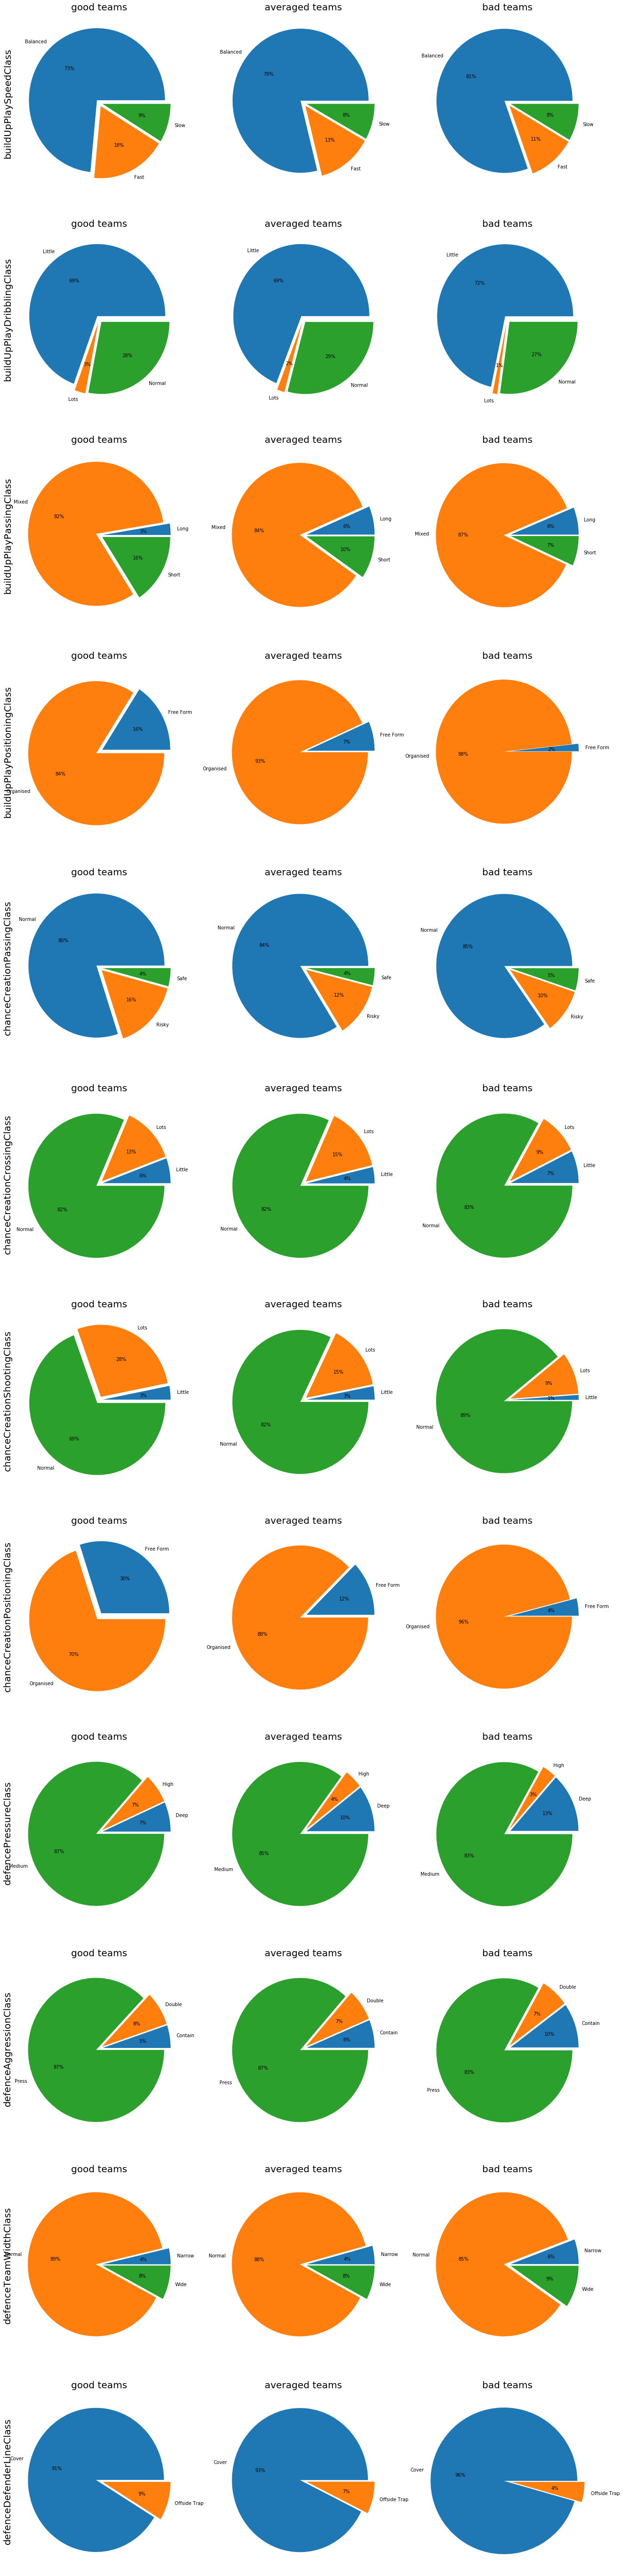

In [18]:
df_filter_good_team=df_league_result[df_league_result['team_class']=='good_team']
df_filter_bad_team=df_league_result[df_league_result['team_class']=='bad_team']

team_attribute_list=['buildUpPlaySpeedClass','buildUpPlayDribblingClass','buildUpPlayPassingClass',
                      'buildUpPlayPositioningClass','chanceCreationPassingClass','chanceCreationCrossingClass',
                      'chanceCreationShootingClass','chanceCreationPositioningClass','defencePressureClass',
                      'defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass']

pp = PdfPages('team_attribute_analysis.pdf')

fig, axes = plt.subplots(len(team_attribute_list),3,figsize=(22,100))

i=0
for team_attribute in team_attribute_list:
     
    df_grouped_good=df_filter_good_team.groupby(team_attribute).size()
    df_grouped_averaged=df_league_result.groupby(team_attribute).size()
    df_grouped_bad=df_filter_bad_team.groupby(team_attribute).size()

    labels=set(list(df_grouped_good.index)+list(df_grouped_good.index)+list(df_grouped_good.index))
    
    df_grouped_good.plot(kind='pie', explode=np.full(len(df_grouped_good), 0.05),autopct='%.0f%%',ax=axes[i,0],title='good teams')
    plt.axis('equal')
    
    df_grouped_averaged.plot(kind='pie', explode=np.full(len(df_grouped_averaged), 0.05), autopct='%.0f%%',ax=axes[i,1],title='averaged teams')
    plt.axis('equal')

    df_grouped_bad.plot(kind='pie', explode=np.full(len(df_grouped_bad), 0.05), autopct='%.0f%%',ax=axes[i,2],title='bad teams')
    plt.axis('equal')
    
    axes[i,0].title.set_size(20)
    axes[i,1].title.set_size(20)
    axes[i,2].title.set_size(20)
    axes[i,0].set_ylabel(team_attribute,fontsize=20)
    axes[i,1].set_ylabel('')
    axes[i,2].set_ylabel('')
    
    i+=1
pp.savefig()
plt.show()
plt.close('all')
pp.close()

Data analysis through pie plot visualisation shows that in European championship (period 2009-2016) good teams have different team attributes compared to bad teams (average teams usually stand in the middle in term of team attributes repartition):
   - good teams tend to play faster than bad teams
   - good teams tend to do more short pass and less long pass than bad teams
   - good teams tend to be more creative than bad teams (more free form position on the field)
   - good teams tend to take more risk in the ball transmission (more risky pass and less safe pass)
   - good teams tend to shoot a lot more on goals than bad teams
   - good teams tend to use more the offside trap in defense compared to bad teams

Since the European chamionship results (period 2009-2016) does not represent the whole population of soccer results, conclusion may not be always valid.

### What is the repartition of points by country and by season?
The aim of the analysis is to assess whether a championship is balanced (low spread) or unbalanced (high spread with outliers with very large number of points)

Text(0.5,1,'Boxplot result of football national championship in Belgium')

Text(0.5,0.98,'')

Text(0.5,0,'Season')

Text(0,0.5,'Corrected points')

(0, 120)

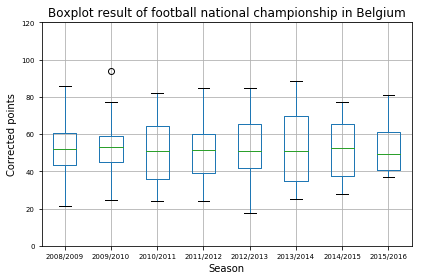

Text(0.5,1,'Boxplot result of football national championship in England')

Text(0.5,0.98,'')

Text(0.5,0,'Season')

Text(0,0.5,'Corrected points')

(0, 120)

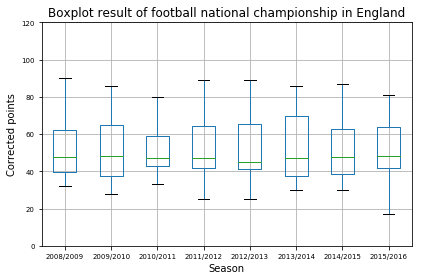

Text(0.5,1,'Boxplot result of football national championship in France')

Text(0.5,0.98,'')

Text(0.5,0,'Season')

Text(0,0.5,'Corrected points')

(0, 120)

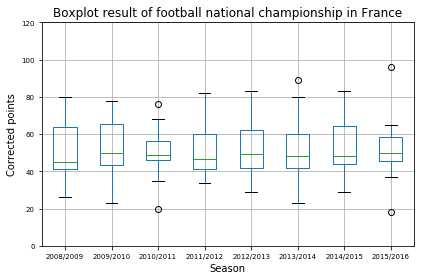

Text(0.5,1,'Boxplot result of football national championship in Germany')

Text(0.5,0.98,'')

Text(0.5,0,'Season')

Text(0,0.5,'Corrected points')

(0, 120)

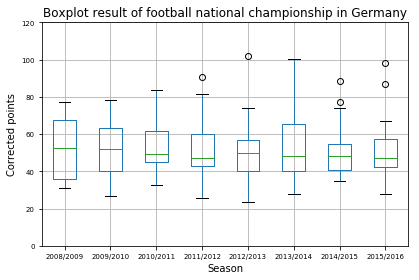

Text(0.5,1,'Boxplot result of football national championship in Italy')

Text(0.5,0.98,'')

Text(0.5,0,'Season')

Text(0,0.5,'Corrected points')

(0, 120)

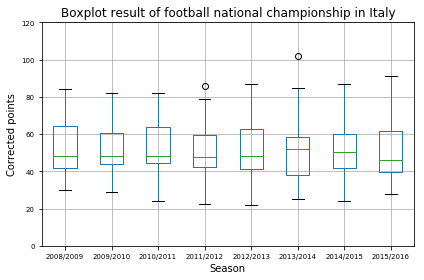

Text(0.5,1,'Boxplot result of football national championship in Netherlands')

Text(0.5,0.98,'')

Text(0.5,0,'Season')

Text(0,0.5,'Corrected points')

(0, 120)

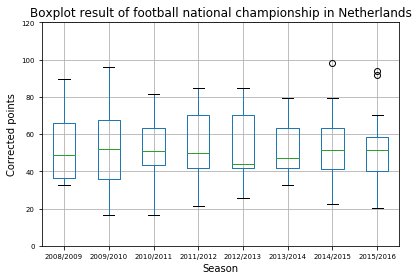

Text(0.5,1,'Boxplot result of football national championship in Poland')

Text(0.5,0.98,'')

Text(0.5,0,'Season')

Text(0,0.5,'Corrected points')

(0, 120)

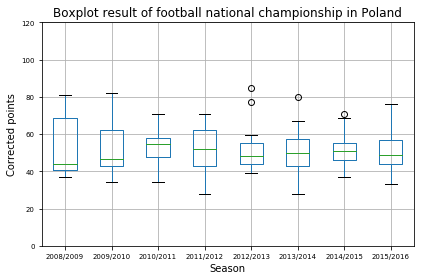

Text(0.5,1,'Boxplot result of football national championship in Portugal')

Text(0.5,0.98,'')

Text(0.5,0,'Season')

Text(0,0.5,'Corrected points')

(0, 120)

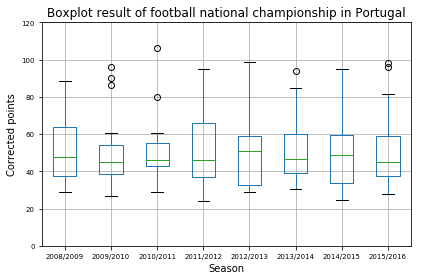

Text(0.5,1,'Boxplot result of football national championship in Scotland')

Text(0.5,0.98,'')

Text(0.5,0,'Season')

Text(0,0.5,'Corrected points')

(0, 120)

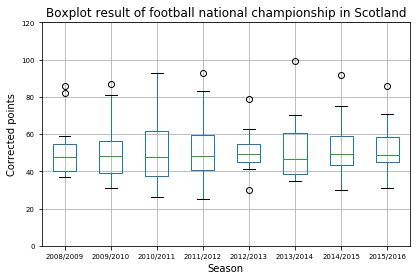

Text(0.5,1,'Boxplot result of football national championship in Spain')

Text(0.5,0.98,'')

Text(0.5,0,'Season')

Text(0,0.5,'Corrected points')

(0, 120)

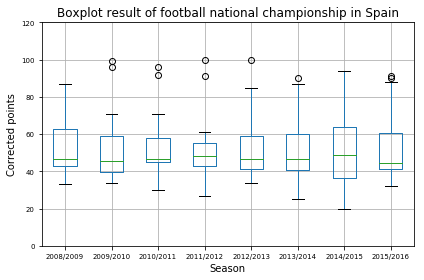

Text(0.5,1,'Boxplot result of football national championship in Switzerland')

Text(0.5,0.98,'')

Text(0.5,0,'Season')

Text(0,0.5,'Corrected points')

(0, 120)

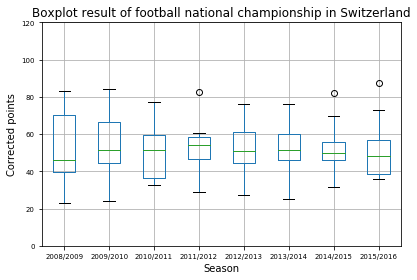

In [19]:
df_grouped=df_league_result.groupby(by='country_name')

pp = PdfPages('championship_analysis_by_season.pdf')

for country_name, df in df_grouped:
    ax=df.boxplot(by='season',column='point_corrected',fontsize=7)
    plt.title('Boxplot result of football national championship in '+country_name)
    plt.suptitle('')
    ax.set_xlabel('Season')
    ax.set_ylabel('Corrected points')
    ax.set_ylim(0,120)
    plt.tight_layout()
    pp.savefig()
    plt.show()
    plt.close('all')
pp.close()

Text(0.5,1,'Boxplot results of european football national championship')

Text(0.5,0.98,'')

Text(0.5,0,'Countries')

Text(0,0.5,'Corrected points')

(0, 120)

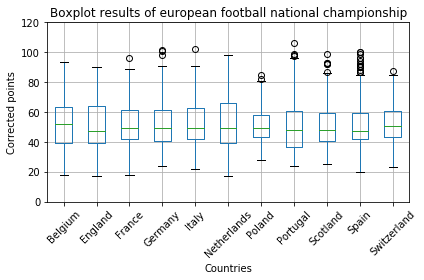

In [20]:
pp = PdfPages('championship_analysis.pdf')
ax=df_league_result.boxplot(by='country_name',column='point_corrected',rot=45)
plt.title('Boxplot results of european football national championship')
plt.suptitle('')
ax.set_xlabel('Countries')
ax.set_ylabel('Corrected points')
ax.set_ylim(0,120)
plt.tight_layout()
pp.savefig()
plt.show()
plt.close('all')
pp.close()

Data analysis through box plot visualisation shows that in European championship (period 2009-2016)
   - Poland is a balanced championship (low spread)
   - Portugal is an unbalanced championship (large spread and top teams tend to be largely above the other teams in the league)

This analysis is only qualitative since no statistical test is done.

### What is the ratio of point, scored goals and conceded goals scored away vs home?
The aim of the analysis is to confirm that playing at home is a clear advantage in football. <br>
The reason for that advantage is not investigated here.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x120b75bd0>],
      dtype=object)

Text(0.5,1,'')

(0, 2)

(0, 250)

Text(0.5,0,'away vs home point')

Text(0,0.5,'number of teams')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1206e9950>],
      dtype=object)

Text(0.5,1,'')

(0, 2)

(0, 250)

Text(0.5,0,'away vs home scored_goal')

Text(0,0.5,'number of teams')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x120bfdb10>],
      dtype=object)

Text(0.5,1,'')

(0, 2)

(0, 250)

Text(0.5,0,'away vs home conceded_goal')

Text(0,0.5,'number of teams')

(0.0, 1.0, 0.0, 1.0)

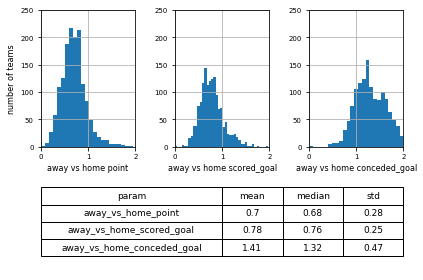

In [21]:
fig = plt.figure()
spec = gridspec.GridSpec(ncols=3, nrows=2,height_ratios=[1,0.5])
ax=[]
ax.append(fig.add_subplot(spec[0, 0]))
ax.append(fig.add_subplot(spec[0, 1]))
ax.append(fig.add_subplot(spec[0, 2]))
ax.append(fig.add_subplot(spec[1, 0:]))

pp = PdfPages('away_vs_home_analysis.pdf')

stat_dict={'param':[],
           'mean':[],
           'std':[],
           'median':[]}

i=0
for param in ['point','scored_goal','conceded_goal']:
    df_league_result.hist(column='away_vs_home_'+param,bins=50,ax=ax[i])
    ax[i].set_title('')
    ax[i].set_xlim(0,2)
    ax[i].set_ylim(0,250)
    ax[i].set_xlabel('away vs home '+param,fontsize=8)
    ax[0].set_ylabel('number of teams',fontsize=8)
    for tick in ax[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(7)
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(7)
    
    stat_dict['param'].append('away_vs_home_'+param)
    stat_dict['mean'].append(round(df_league_result['away_vs_home_'+param].mean(),2))
    stat_dict['std'].append(round(df_league_result['away_vs_home_'+param].std(),2))
    stat_dict['median'].append(round(df_league_result['away_vs_home_'+param].median(),2))
    
    i+=1

df_stat=pd.DataFrame(stat_dict,columns=['param','mean','median','std'])

table=ax[3].table(cellText=df_stat.values, colLabels=df_stat.columns,cellLoc='center',
                  bbox=[0,0,1,1],colWidths=[3,1,1,1])
plt.axis('off')
plt.tight_layout()
pp.savefig()
plt.show()
plt.close('all')
pp.close()

Data analysis through histogram visualisation and some statistical calculation show that in European championship (period 2009-2016), there is a clear advantage when playing at home.<br>
In average in European championship (period 2009-2016) soccer teams 
   - score 30% less points when playing away
   - score 22% less goals when playing away
   - concede 41% more goals when playing away

There is a clear correlation between the performance of the team and the place where it plays. However, causation is not proved with such analysis.

### How championship winner results evolve with time?
The aim of the analysis is to show the performance evolution of teams who won the championship as a function of time (season)

Text(0.5,1,'Team rank evolution in Belgium')

Text(0.5,0,'Season')

Text(0,0.5,'Rank')

(0, 20)

([<matplotlib.axis.YTick at 0x12005f690>,
 <a list of 5 Text yticklabel objects>)

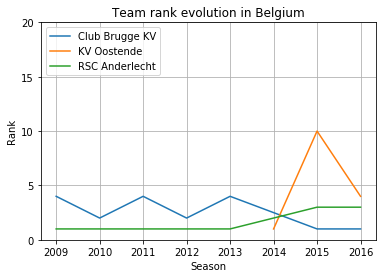

Text(0.5,1,'Team rank evolution in England')

Text(0.5,0,'Season')

Text(0,0.5,'Rank')

(0, 20)

([<matplotlib.axis.YTick at 0x12041c150>,
 <a list of 5 Text yticklabel objects>)

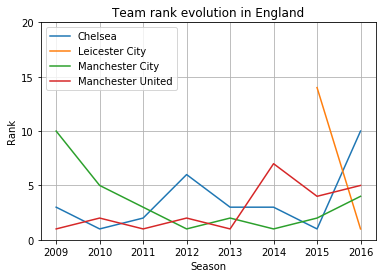

Text(0.5,1,'Team rank evolution in France')

Text(0.5,0,'Season')

Text(0,0.5,'Rank')

(0, 20)

([<matplotlib.axis.YTick at 0x125aa2f50>,
 <a list of 5 Text yticklabel objects>)

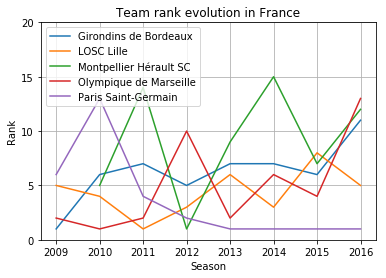

Text(0.5,1,'Team rank evolution in Germany')

Text(0.5,0,'Season')

Text(0,0.5,'Rank')

(0, 20)

([<matplotlib.axis.YTick at 0x11f3dee90>,
 <a list of 5 Text yticklabel objects>)

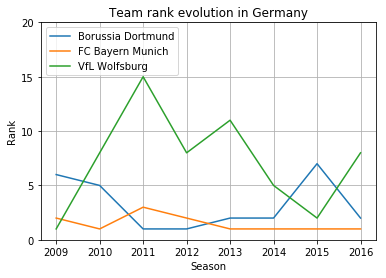

Text(0.5,1,'Team rank evolution in Italy')

Text(0.5,0,'Season')

Text(0,0.5,'Rank')

(0, 20)

([<matplotlib.axis.YTick at 0x120ccb510>,
 <a list of 5 Text yticklabel objects>)

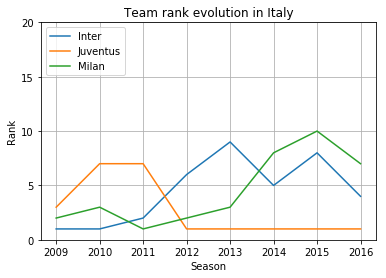

Text(0.5,1,'Team rank evolution in Netherlands')

Text(0.5,0,'Season')

Text(0,0.5,'Rank')

(0, 20)

([<matplotlib.axis.YTick at 0x125aece90>,
 <a list of 5 Text yticklabel objects>)

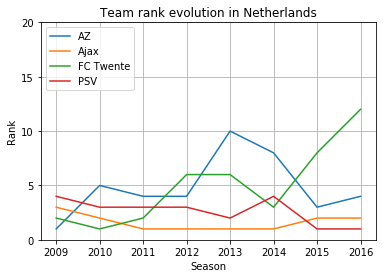

Text(0.5,1,'Team rank evolution in Poland')

Text(0.5,0,'Season')

Text(0,0.5,'Rank')

(0, 20)

([<matplotlib.axis.YTick at 0x125904f10>,
 <a list of 5 Text yticklabel objects>)

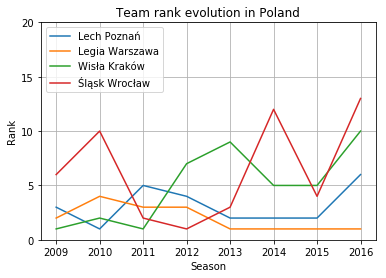

Text(0.5,1,'Team rank evolution in Portugal')

Text(0.5,0,'Season')

Text(0,0.5,'Rank')

(0, 20)

([<matplotlib.axis.YTick at 0x1209b3f10>,
 <a list of 5 Text yticklabel objects>)

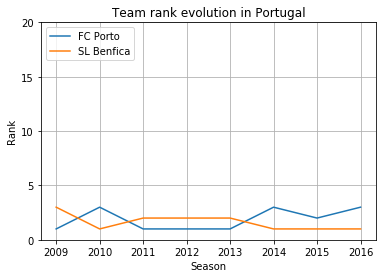

Text(0.5,1,'Team rank evolution in Scotland')

Text(0.5,0,'Season')

Text(0,0.5,'Rank')

(0, 20)

([<matplotlib.axis.YTick at 0x1259d5b10>,
 <a list of 5 Text yticklabel objects>)

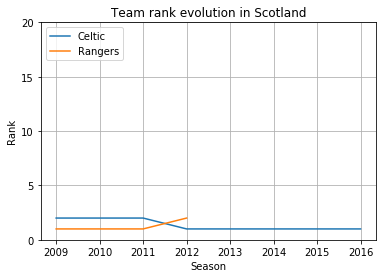

Text(0.5,1,'Team rank evolution in Spain')

Text(0.5,0,'Season')

Text(0,0.5,'Rank')

(0, 20)

([<matplotlib.axis.YTick at 0x125a43310>,
 <a list of 5 Text yticklabel objects>)

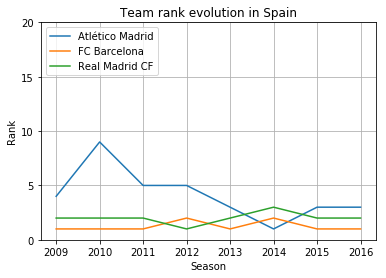

Text(0.5,1,'Team rank evolution in Switzerland')

Text(0.5,0,'Season')

Text(0,0.5,'Rank')

(0, 20)

([<matplotlib.axis.YTick at 0x125a287d0>,
 <a list of 5 Text yticklabel objects>)

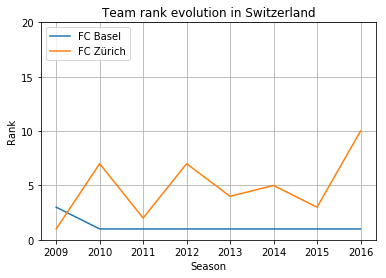

In [22]:
top_team_list=df_league_result[df_league_result['rank']==1]['team_api_id'].unique()
df_filter_good_team=df_league_result[df_league_result['team_api_id'].isin(top_team_list)]
df_grouped_country=df_filter_good_team.groupby(by='country_name')

pp = PdfPages('team_rank_by_country.pdf')

for country, df1 in df_grouped_country:
    fig,ax =plt.subplots()
    for label, df2 in df1.groupby(by='team_long_name'):
        df2.plot(kind='line',x='year',y='rank', ax=ax,label=label,grid=True)

    plt.title('Team rank evolution in '+country)
    ax.set_xlabel('Season')
    ax.set_ylabel('Rank')
    ax.set_ylim(0,20)
    plt.yticks(np.arange(0, 21, 5))
    ax.legend(loc=2)
    pp.savefig()
    plt.show()
    plt.close('all')
pp.close()

Data analysis through line visualisation shows that European chamionship (period 2009-2016), winners stay in the top teams on the long term with some exceptions:

   - KV Oostende in Belgium from winner (2014) to 10th place (2015)
   - Leicester City in England from 14th place (2015 and not even in championship in 2014) to winner (2016)
   - Montpellier Herault in France from 14th place (2011) to winner in 2012

It is remarkable that in some countries like Portugal, Scotland and Switzerland only 2 teams won the championship during the period 2009-2016 <br>

Since the European chamionship results (period 2009-2016) does not represent the whole population of soccer results, conclusion may not be always valid.

<a id='conclusions'></a>
## Conclusions

Soccer database has been analyzed. <br>
A results table by season and by championship has been built. <br>
Based on this table, I tryed to answer following questions: <br>

**What are team attributes of successful, average and unsuccessful teams?** <br>

Data analysis through pie plot visualisation shows that in European championship (period 2009-2016) good teams have different team attributes compared to bad teams (average teams usually stand in the middle in term of team attributes repartition):
   - good teams tend to play faster than bad teams
   - good teams tend to do more short pass and less long pass than bad teams
   - good teams tend to be more creative than bad teams (more free form position on the field)
   - good teams tend to take more risk in the ball transmission (more risky pass and less safe pass)
   - good teams tend to shoot a lot more on goals than bad teams
   - good teams tend to use more the offside trap in defense compared to bad teams

Since the European chamionship results (period 2009-2016) does not represent the whole population of soccer results, conclusion may not be always valid.

**Are all soccer european championships as tight?** <br>

Data analysis through box plot visualisation shows that in European championship (period 2009-2016)
   - Poland is a balanced championship (low spread)
   - Portugal is an unbalanced championship (large spread and top teams tend to be largely above the other teams in the league)

This analysis is only qualitative since no statistical test is done.

**Is it favorable to play at home?** <br>

Data analysis through histogram visualisation and some statistical calculation show that in European championship (period 2009-2016), there is a clear advantage when playing at home.<br>
In average in European championship (period 2009-2016) soccer teams 
   - score 30% less points when playing away
   - score 22% less goals when playing away
   - concede 41% more goals when playing away

There is a clear correlation between the performance of the team and the place where it plays. However, causation is not proved with such analysis.

** How championship winner results evolve with time?** <br>

Data analysis through line visualisation shows that European chamionship (period 2009-2016), winners stay in the top teams on the long term with some exceptions:

   - KV Oostende in Belgium from winner (2014) to 10th place (2015)
   - Leicester City in England from 14th place (2015 and not even in championship in 2014) to winner (2016)
   - Montpellier Herault in France from 14th place (2011) to winner in 2012

It is remarkable that in some countries like Portugal, Scotland and Switzerland only 2 teams won the championship during the period 2009-2016 <br>

Since the European chamionship results (period 2009-2016) does not represent the whole population of soccer results, conclusion may not be always valid.